#---------------- Caesar Cipher Implementation ----------------

In [2]:
import numpy as np
import random
import string
# import secretpy as sp
# import pycipher as pc

In [3]:
def shift_cipher_encrypt(text, key):
    shift=key%26
    return "".join(chr(((ord(c)-65+shift)%26)+65) for c in text)

In [4]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"


plaintext_1 = "AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"
plaintext_2 = "AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB"
plaintext_3 = "AdistributedsystemisacollectionofindependententitiesthatcooperatetosolveaproblemthatcannotbeindividuallysolvedDistributedsystemshavebeeninexistencesincethestartoftheuniverseFromaschooloffishtoaflockofbirdsandentireecosystemsofmicroorganismsthereiscommunicationamongmobileintelligentagentsinnatureWiththewidespreadproliferationoftheinternetandtheemergingglobalvillagethenotionofdistributedcomputingsystemsasausefulandwidelydeployedtoolisbecomingareality"
# random plaintext of length 453 using alpahbet and random.choices
plaintext_4 =  ''.join(random.choices(alphabet, k=453))
plaintext_array = [plaintext_1, plaintext_2, plaintext_3, plaintext_4]

In [5]:
# get a random shift key between 1 and 25 and repeat for 100 trials
for plaintext in plaintext_array:
    key = random.randint(1, 25)
    ciphertext = shift_cipher_encrypt(plaintext, key)
    print("\nPlaintext:", plaintext)
    print("Ciphertext:", ciphertext)        
    
    def measure_avalanche_effect(original_plaintext, key, num_trials=100):
        original_ciphertext = shift_cipher_encrypt(original_plaintext, key)
        total_changed_chars = 0
        for _ in range(num_trials):
            # Change one character in the plaintext
            index_to_change = random.randint(0, len(original_plaintext) - 1)
            new_char = random.choice(string.ascii_uppercase.replace(original_plaintext[index_to_change], ''))
            modified_plaintext = (original_plaintext[:index_to_change] + new_char + 
                                  original_plaintext[index_to_change + 1:])
            modified_ciphertext = shift_cipher_encrypt(modified_plaintext, key)
            # Count differing characters in the ciphertexts
            changed_chars = sum(1 for a, b in zip(original_ciphertext, modified_ciphertext) if a != b)
            total_changed_chars += changed_chars
    # printd reusults
            average_changed_chars = total_changed_chars / num_trials
            avalanche_effect = average_changed_chars 
            # / len(original_ciphertext)
            return avalanche_effect 
    avalanche_effect = measure_avalanche_effect(plaintext, key)
    print(f"Avalanche Effect: {avalanche_effect} characters changed on average")


Plaintext: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Ciphertext: SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
Avalanche Effect: 0.01 characters changed on average

Plaintext: AAAAA

In [ ]:
#measure confusion effect over plaintext and key and repeat for 100 trials
def measure_confusion(original_plaintext, original_key, num_trials=100):
    original_ciphertext = shift_cipher_encrypt(original_plaintext, original_key)
    total_changed_chars = 0
    for _ in range(num_trials):
        # Change one character in the key
        new_key = original_key
        while new_key == original_key:
            new_key = random.randint(1, 25)
        modified_ciphertext = shift_cipher_encrypt(original_plaintext, new_key)
        # Count differing characters in the ciphertexts
        changed_chars = sum(1 for a, b in zip(original_ciphertext, modified_ciphertext) if a != b)
        total_changed_chars += changed_chars
    average_changed_chars = total_changed_chars / num_trials
    confusion_effect = average_changed_chars 
    # / len(original_ciphertext)
    return confusion_effect
for plaintext_a in plaintext_array:
    key_a = random.randint(1, 25)
    confusion_effect = measure_confusion(plaintext_a, key_a)
    print(f"Confusion Effect: {confusion_effect} characters changed on average")    



Confusion Effect: 452.0 characters changed on average
Confusion Effect: 453.0 characters changed on average
Confusion Effect: 452.0 characters changed on average
Confusion Effect: 453.0 characters changed on average


In [7]:
#To quantify confusion, you'll encrypt a fixed plaintext using a specific key. Then, make an incremental change to the key and re-encrypt the same plaintext. 
# You'll then measure the resulting change in the ciphertext and report the average changes. This process helps measure the cipher's 
#confusion property by observing how sensitive the ciphertext is to small changes in the key.

#measure diffusion effect over plaintext and key and repeat for 100 trials
def measure_diffusion(original_plaintext, original_key, num_trials=100):
    original_ciphertext = shift_cipher_encrypt(original_plaintext, original_key)
    total_changed_chars = 0
    for _ in range(num_trials):
        # Change one character in the plaintext
        index_to_change = random.randint(0, len(original_plaintext) - 1)
        new_char = random.choice(string.ascii_uppercase.replace(original_plaintext[index_to_change], ''))
        modified_plaintext = (original_plaintext[:index_to_change] + new_char + 
                              original_plaintext[index_to_change + 1:])
        modified_ciphertext = shift_cipher_encrypt(modified_plaintext, original_key)
        # Count differing characters in the ciphertexts
        changed_chars = sum(1 for a, b in zip(original_ciphertext, modified_ciphertext) if a != b)
        total_changed_chars += changed_chars
    average_changed_chars = total_changed_chars / num_trials
    diffusion_effect = average_changed_chars 
    # / len(original_ciphertext)
    return diffusion_effect
for plaintext_b in plaintext_array:
    key_b = random.randint(1, 25)
    diffusion_effect = measure_diffusion(plaintext_b, key_b)
    print(f"Diffusion Effect: {diffusion_effect} characters changed on average")

Diffusion Effect: 1.0 characters changed on average
Diffusion Effect: 1.0 characters changed on average
Diffusion Effect: 0.94 characters changed on average
Diffusion Effect: 1.0 characters changed on average


In [8]:
#calculating shannon entropy of the ciphertext
def shannon_entropy(text):
    # Calculate frequency of each character in the text
    freq = {}
    for char in text:
        if char in freq:
            freq[char] += 1
        else:
            freq[char] = 1
    # Calculate probabilities
    probabilities = [count / len(text) for count in freq.values()]
    # Calculate Shannon entropy
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
    return entropy  
for plaintext_m in plaintext_array:
    key_m = random.randint(1, 25)
    ciphertext_m = shift_cipher_encrypt(plaintext_m, key_m)
    ciphertext_entropy = shannon_entropy(ciphertext_m)
    print(f"Shannon Entropy of Ciphertext for given plaintext: {ciphertext_entropy:.4f} bits per character")

Shannon Entropy of Ciphertext for given plaintext: -0.0000 bits per character
Shannon Entropy of Ciphertext for given plaintext: 0.9915 bits per character
Shannon Entropy of Ciphertext for given plaintext: 4.1180 bits per character
Shannon Entropy of Ciphertext for given plaintext: 4.6626 bits per character


In [9]:
#calculating mutual information between plaintext and ciphertext
def mutual_information(plaintext, ciphertext):
    # Calculate frequency of each character in the plaintext
    freq_plain = {}
    for char in plaintext:
        if char in freq_plain:
            freq_plain[char] += 1
        else:
            freq_plain[char] = 1
    # Calculate frequency of each character in the ciphertext
    freq_cipher = {}
    for char in ciphertext:
        if char in freq_cipher:
            freq_cipher[char] += 1
        else:
            freq_cipher[char] = 1
    # Calculate joint frequency
    joint_freq = {}
    for p_char, c_char in zip(plaintext, ciphertext):
        pair = (p_char, c_char)
        if pair in joint_freq:
            joint_freq[pair] += 1
        else:
            joint_freq[pair] = 1
    # Calculate probabilities
    prob_plain = {char: count / len(plaintext) for char, count in freq_plain.items()}
    prob_cipher = {char: count / len(ciphertext) for char, count in freq_cipher.items()}
    prob_joint = {pair: count / len(plaintext) for pair, count in joint_freq.items()}
    # Calculate mutual information
    mi = 0
    for (p_char, c_char), p_joint in prob_joint.items():
        p_p = prob_plain[p_char]
        p_c = prob_cipher[c_char]
        mi += p_joint * np.log2(p_joint / (p_p * p_c))
    return mi
for plaintext_k in plaintext_array:
    key_k = random.randint(1, 25)
    ciphertext_k = shift_cipher_encrypt(plaintext_k, key_k)
    mi = mutual_information(plaintext_k, ciphertext_k)
    print(f"Mutual Information between Plaintext and Ciphertext: {mi:.4f} bits")

Mutual Information between Plaintext and Ciphertext: 0.0000 bits
Mutual Information between Plaintext and Ciphertext: 0.9915 bits
Mutual Information between Plaintext and Ciphertext: 4.1180 bits
Mutual Information between Plaintext and Ciphertext: 4.6626 bits


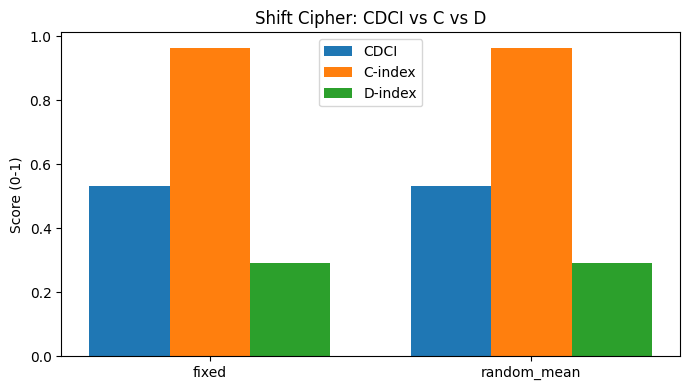

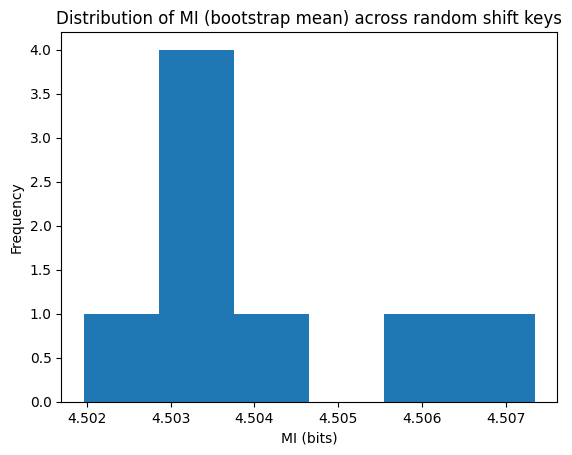

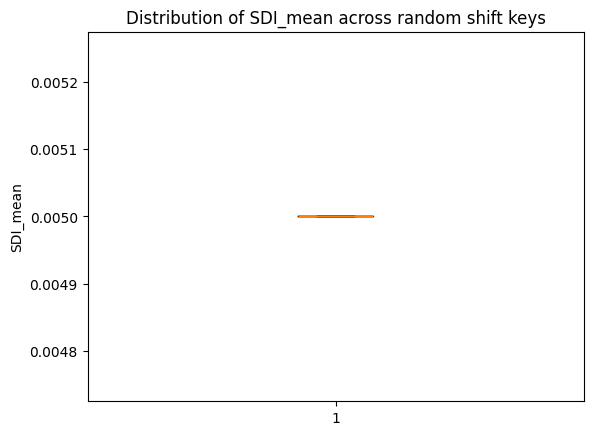

CSV files saved: shift_cipher_fixed.csv, shift_cipher_random.csv, shift_cipher_summary.csv


In [8]:
import math, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter
# from caas_jupyter_tools import display_dataframe_to_user

random.seed(42)
np.random.seed(42)

ALPHABET = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# ---------------- Shift Cipher ----------------
def shift_encrypt(text, key):
    text = "".join(ch for ch in text.upper() if 'A' <= ch <= 'Z')
    return "".join(chr(((ord(c)-65+key)%26)+65) for c in text)

# ---------------- Metric Functions ----------------
def fraction_changed(a, b):
    return sum(x!=y for x,y in zip(a,b)) / len(a)

def symbol_diffusion_index(cipher_func, plaintext, key, alphabet, trials=10):
    L = len(plaintext)
    C = cipher_func(plaintext, key)
    results = []
    for _ in range(trials):
        i = random.randrange(L)
        new_char = random.choice([c for c in alphabet if c != plaintext[i]])
        P2 = plaintext[:i]+new_char+plaintext[i+1:]
        C2 = cipher_func(P2, key)
        results.append(fraction_changed(C, C2))
    return np.mean(results), np.std(results)

def compute_ksi(cipher_func, plaintext, key, key_variant):
    C = cipher_func(plaintext, key)
    C2 = cipher_func(plaintext, key_variant)
    return fraction_changed(C, C2)

def mutual_information(pairs):
    N = len(pairs)
    joint = Counter(pairs)
    X_counts = Counter(x for x,_ in pairs)
    Y_counts = Counter(y for _,y in pairs)
    mi = 0.0
    for (x,y), n in joint.items():
        p_xy = n/N
        p_x = X_counts[x]/N
        p_y = Y_counts[y]/N
        mi += p_xy * math.log2(p_xy/(p_x*p_y))
    return mi

def compute_mi_from_plain_cipher_lists(plain_list, cipher_list):
    pairs = list(zip("".join(plain_list), "".join(cipher_list)))
    return mutual_information(pairs)

def compute_chi_entropy(ciphertexts, alphabet):
    text = "".join(ciphertexts)
    N = len(text)
    counts = Counter(text)
    expected = N/len(alphabet)
    chi2 = sum((counts[a]-expected)**2/expected for a in alphabet)
    entropy = -sum((counts[a]/N)*math.log2(counts[a]/N) for a in counts if counts[a]>0)
    return chi2, entropy

def bootstrap_mi(pairs, n_boot=200, alpha=0.05):
    estimates=[]
    N = len(pairs)
    for _ in range(n_boot):
        sample = [pairs[random.randrange(N)] for _ in range(N)]
        mi = mutual_information(sample)
        estimates.append(mi)
    estimates.sort()
    low = estimates[int((alpha/2)*n_boot)]
    high= estimates[int((1-alpha/2)*n_boot)]
    return np.mean(estimates), (low,high)

# ---------------- CDCI ----------------
def confusion_index(cipher_func, plaintext, keyspace, samples=200):
    pairs = []
    for _ in range(samples):
        k = random.choice(keyspace)
        c = cipher_func(plaintext, k)
        for sym in c:
            pairs.append((str(k), sym))
    mi = mutual_information(pairs)
    H_K = math.log2(len(keyspace))
    C = 1 - (mi / H_K if H_K>0 else 0)
    return max(0, min(1, C))

def ciphertext_entropy_one(cipher_func, plaintext, key):
    C = cipher_func(plaintext, key)
    chi2, Hc = compute_chi_entropy([C], ALPHABET)
    return Hc

def diffusion_index(cipher_func, plaintext, key, alphabet, alpha=0.7, trials=10):
    sdi_mean, sdi_std = symbol_diffusion_index(cipher_func, plaintext, key, alphabet, trials)
    Hc = ciphertext_entropy_one(cipher_func, plaintext, key)
    norm_H = Hc / math.log2(len(alphabet))
    D = alpha*sdi_mean + (1-alpha)*norm_H
    return D, sdi_mean, sdi_std, norm_H

def cdci_score(cipher_func, plaintext, key, keyspace, alphabet, alpha=0.7):
    C = confusion_index(cipher_func, plaintext, keyspace)
    D, sdi_mean, sdi_std, norm_H = diffusion_index(cipher_func, plaintext, key, alphabet, alpha=alpha)
    return math.sqrt(C*D), C, D, sdi_mean, sdi_std, norm_H

# ---------------- Experiment ----------------
num_texts = 5
length = 200
plaintexts = ["".join(random.choice(ALPHABET) for _ in range(length)) for _ in range(num_texts)]
plaintexts[0] = ("THEQUICKBROWNFOXJUMPSOVERTHELAZYDOG" * 6)[:length]

fixed_key = 3
random_key_count = 8
random_keys = random.sample(range(26), random_key_count)
keyspace_for_confusion = list(range(26))

# --- Mode A: Fixed Key ---
fixed_results = {}
sdi_vals=[]; sdi_stds=[]; ksi_vals=[]; mi_vals=[]; chi_vals=[]; entropy_vals=[]; mi_boot_means=[]; mi_boot_cis=[]
for pt in plaintexts:
    sdi_mean, sdi_std = symbol_diffusion_index(shift_encrypt, pt, fixed_key, ALPHABET, trials=20)
    sdi_vals.append(sdi_mean); sdi_stds.append(sdi_std)
    ksi_vals.append(compute_ksi(shift_encrypt, pt, fixed_key, (fixed_key+1)%26))
    Ctext = shift_encrypt(pt, fixed_key)
    mi_vals.append(compute_mi_from_plain_cipher_lists([pt],[Ctext]))
    chi2,Hc = compute_chi_entropy([Ctext], ALPHABET)
    chi_vals.append(chi2); entropy_vals.append(Hc)
    mean_boot, ci = bootstrap_mi(list(zip(pt,Ctext)), n_boot=150)
    mi_boot_means.append(mean_boot); mi_boot_cis.append(ci)

fixed_results['SDI_mean']=np.mean(sdi_vals); fixed_results['SDI_std_mean']=np.mean(sdi_stds)
fixed_results['KSI_mean']=np.mean(ksi_vals); fixed_results['MI_mean']=np.mean(mi_vals)
fixed_results['Chi2_mean']=np.mean(chi_vals); fixed_results['Entropy_mean']=np.mean(entropy_vals)
fixed_results['MI_boot_mean']=np.mean(mi_boot_means)
fixed_results['MI_boot_CI_low']=np.mean([ci[0] for ci in mi_boot_cis])
fixed_results['MI_boot_CI_high']=np.mean([ci[1] for ci in mi_boot_cis])
fixed_cdci,fixed_C,fixed_D,_,_,_ = cdci_score(shift_encrypt, plaintexts[0], fixed_key, keyspace_for_confusion, ALPHABET)
fixed_results['CDCI']=fixed_cdci; fixed_results['C_index']=fixed_C; fixed_results['D_index']=fixed_D

fixed_df = pd.DataFrame([fixed_results])

# --- Mode B: Random Keys ---
random_mode_results=[]
for rk in random_keys:
    sdi_vals=[]; sdi_stds=[]; ksi_vals=[]; mi_vals=[]; chi_vals=[]; entropy_vals=[]; mi_boot_means=[]
    for pt in plaintexts:
        sdi_mean,sdi_std = symbol_diffusion_index(shift_encrypt, pt, rk, ALPHABET, trials=12)
        sdi_vals.append(sdi_mean); sdi_stds.append(sdi_std)
        other=random.choice([k for k in range(26) if k!=rk])
        ksi_vals.append(compute_ksi(shift_encrypt, pt, rk, other))
        Ctext=shift_encrypt(pt,rk)
        mi_vals.append(compute_mi_from_plain_cipher_lists([pt],[Ctext]))
        chi2,Hc=compute_chi_entropy([Ctext],ALPHABET)
        chi_vals.append(chi2); entropy_vals.append(Hc)
        mean_boot,_=bootstrap_mi(list(zip(pt,Ctext)),n_boot=100)
        mi_boot_means.append(mean_boot)
    CDCI,C,D,_,_,_ = cdci_score(shift_encrypt, plaintexts[0], rk, keyspace_for_confusion, ALPHABET)
    random_mode_results.append({
        'key':rk,'SDI_mean':np.mean(sdi_vals),'SDI_std_mean':np.mean(sdi_stds),
        'KSI_mean':np.mean(ksi_vals),'MI_mean':np.mean(mi_vals),
        'Chi2_mean':np.mean(chi_vals),'Entropy_mean':np.mean(entropy_vals),
        'MI_boot_mean':np.mean(mi_boot_means),'CDCI':CDCI,'C_index':C,'D_index':D
    })
random_df=pd.DataFrame(random_mode_results).sort_values('key').reset_index(drop=True)

summary=pd.DataFrame({
    'mode':['fixed','random_mean'],
    'SDI_mean':[fixed_results['SDI_mean'],random_df['SDI_mean'].mean()],
    'KSI_mean':[fixed_results['KSI_mean'],random_df['KSI_mean'].mean()],
    'MI_mean':[fixed_results['MI_mean'],random_df['MI_mean'].mean()],
    'Entropy_mean':[fixed_results['Entropy_mean'],random_df['Entropy_mean'].mean()],
    'CDCI':[fixed_results['CDCI'],random_df['CDCI'].mean()],
    'C_index':[fixed_results['C_index'],random_df['C_index'].mean()],
    'D_index':[fixed_results['D_index'],random_df['D_index'].mean()],
})

# ---------------- Outputs ----------------
# display_dataframe_to_user("Shift Cipher - Fixed Key Results", fixed_df)
# display_dataframe_to_user("Shift Cipher - Random Keys Results", random_df)
# display_dataframe_to_user("Shift Cipher - Summary", summary)

# Bar chart (CDCI, C, D)
labels=summary['mode']; x=np.arange(len(labels)); width=0.25
fig,ax=plt.subplots(figsize=(7,4))
ax.bar(x-width,summary['CDCI'],width,label='CDCI')
ax.bar(x,summary['C_index'],width,label='C-index')
ax.bar(x+width,summary['D_index'],width,label='D-index')
ax.set_xticks(x); ax.set_xticklabels(labels); ax.set_ylabel('Score (0-1)')
ax.set_title('Shift Cipher: CDCI vs C vs D'); ax.legend(); plt.tight_layout(); plt.show()

# Histogram of MI bootstrap means
plt.hist(random_df['MI_boot_mean'],bins=6)
plt.title('Distribution of MI (bootstrap mean) across random shift keys')
plt.xlabel('MI (bits)'); plt.ylabel('Frequency'); plt.show()

# Boxplot of SDI
plt.boxplot(random_df['SDI_mean'].dropna())
plt.title('Distribution of SDI_mean across random shift keys')
plt.ylabel('SDI_mean'); plt.show()

# Save CSVs
fixed_df.to_csv('./data/shift_cipher_fixed.csv',index=False)
random_df.to_csv('./data/shift_cipher_random.csv',index=False)
summary.to_csv('./data/shift_cipher_summary.csv',index=False)
print("CSV files saved: shift_cipher_fixed.csv, shift_cipher_random.csv, shift_cipher_summary.csv")

In [9]:
fixed_df

,SDI_mean,SDI_std_mean,KSI_mean,MI_mean,Chi2_mean,Entropy_mean,MI_boot_mean,MI_boot_CI_low,MI_boot_CI_high,CDCI,C_index,D_index
0,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.501614,4.40271,4.585929,0.531281,0.964273,0.292718


In [10]:
random_df

,key,SDI_mean,SDI_std_mean,KSI_mean,MI_mean,Chi2_mean,Entropy_mean,MI_boot_mean,CDCI,C_index,D_index
0,8,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.503355,0.531272,0.964237,0.292718
1,10,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.503217,0.531287,0.964291,0.292718
2,11,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.503056,0.531362,0.964566,0.292718
3,13,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.504468,0.531277,0.964256,0.292718
4,14,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.507348,0.531273,0.964243,0.292718
5,17,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.503201,0.531366,0.964580,0.292718
6,23,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.506313,0.531284,0.964281,0.292718
7,25,0.005,8.673617e-19,1.0,4.597276,30.724,4.597276,4.501962,0.531315,0.964394,0.292718


In [11]:
summary

,mode,SDI_mean,KSI_mean,MI_mean,Entropy_mean,CDCI,C_index,D_index
0,fixed,0.005,1.0,4.597276,4.597276,0.531281,0.964273,0.292718
1,random_mean,0.005,1.0,4.597276,4.597276,0.531304,0.964356,0.292718
